# Pandas

참고자료
- 파이썬 머신러닝 완벽 가이드(권철민): https://github.com/wikibook/ml-definitive-guide
- pandas(판다스) 기초 정리(Tigercow.Door): https://doorbw.tistory.com/172

In [1]:
import pandas as pd
import numpy as np
pd.__version__

'1.0.5'

In [4]:
def df_simple():
    data = {'name': ['Beomwoo', 'Beomwoo', 'Beomwoo', 'Kim', 'Park'],
            'year': [2013, 2014, 2015, 2016, 2015],
            'points': [1.5, 1.7, 3.6, 2.4, 2.9]}
    return pd.DataFrame(data)

In [8]:
def df_num():
    data = [[1, 3],
            [2, 4],
            [3, 1]]
    df = pd.DataFrame(data, columns=["col1", "col2"], 
                        index=["idx1", "idx2", "idx3"])
    return df

In [ ]:
def df_nan():
    data = [[1.4, np.nan],
            [7.1, -4.5],
            [np.nan, np.nan],
            [0.75, -1.3],
            [1, -1.3]]
    df = pd.DataFrame(data, columns=["col1", "col2"], 
                        index=["idx1", "idx2", "idx3", "idx4","idx5"])
    return df

In [ ]:
def df_titanic():
    titanic_df = pd.read_csv('data/titanic_train.csv')
    titanic_df_fix = titanic_df.drop(['Name','Ticket'], axis=1)
    return titanic_df_fix

## Series

### Series 생성하기: pd.Series()

In [ ]:
s1 = pd.Series([4, 7, -5])        #from list. index 자동으로 0부터 들어감
s2 = pd.Series([4, 7, -5], index=['d', 'b', 'a'])
s3 = pd.Series({'Kim': 35000, 'Beomwoo': 67000, 'Joan': 12000}) #from dictionary

print(s1,s2,s3, sep="\n\n")

0    4
1    7
2   -5
dtype: int64

d    4
b    7
a   -5
dtype: int64

Kim        35000
Beomwoo    67000
Joan       12000
dtype: int64


하지만 보통의 경우에는 df에서 특정 열 또는 행을 선택하면서 series가 생겨남

In [ ]:
df = df_simple()
print(df, "\n")

s1 = df['points'] # 특정 칼럼 선택. row index가 index로 들어감
print(s1, "\n", type(s1))

s1_1 = df.iloc[0,:]
print(s1_1, "\n", type(s1_1))  # 특정 행 선택. column names가 index로 들어감

      name  year  points
0  Beomwoo  2013     1.5
1  Beomwoo  2014     1.7
2  Beomwoo  2015     3.6
3      Kim  2016     2.4
4     Park  2015     2.9 

0    1.5
1    1.7
2    3.6
3    2.4
4    2.9
Name: points, dtype: float64 
 <class 'pandas.core.series.Series'>
name      Beomwoo
year         2013
points        1.5
Name: 0, dtype: object 
 <class 'pandas.core.series.Series'>


In [ ]:
# pandas의 row 1줄 선택해도 series 리턴됨
s2 = df.loc[0,:]
print(s2, "\n", type(s2))

name      Beomwoo
year         2013
points        1.5
Name: 0, dtype: object 
 <class 'pandas.core.series.Series'>


In [ ]:
s2['name']

'Beomwoo'

### Series 구성요소

#### .index, .values
Series= index+ 단 한 줄의 values

In [ ]:
si = s1.index # RangeIndex
sv = s1.values # numpy.ndarray
print(type(si),si)
print(type(sv),sv, "\n\n")

<class 'pandas.core.indexes.range.RangeIndex'> RangeIndex(start=0, stop=3, step=1)
<class 'numpy.ndarray'> [1.5 1.7 3.6] 




In [ ]:
# index 변경하기
s1.index = ['A', 'B', 'C']
s1

A    1.5
B    1.7
C    3.6
Name: points, dtype: float64

#### .name, .dtypes

In [ ]:
# df로 부터 만들면 Series의 Name이 기존 df의 col name으로 들어가있음
s1 = df['points'].head(3) 
print(s1, "\n")

s1.name = 'points_f'
print(s1, "\n")

0    1.5
1    1.7
2    3.6
Name: points, dtype: float64 

0    1.5
1    1.7
2    3.6
Name: points_f, dtype: float64 



In [ ]:
# Series의 자료형 확인하기. Series는 df와 달리 한 col만 가지니 Series 수준에서 dtype이 존재
s1.dtypes

dtype('float64')

### series에 일괄 적용할 때 다른 점

#### ~: not을 일괄적용할 때

In [ ]:
s = pd.Series([True, True, False, True])
~s
# not s # 이렇게 하면 ambiguous 하다며 오류남

0    False
1    False
2     True
3    False
dtype: bool

## Data Frame

### Data Frame 구조: df.index / columns / values

In [ ]:
df = df_simple()
df

,name,year,points
0,Beomwoo,2013,1.5
1,Beomwoo,2014,1.7
2,Beomwoo,2015,3.6
3,Kim,2016,2.4
4,Park,2015,2.9


In [ ]:
idx = df.index         # index명 목록(행 이름). RangeIndex 라는 타입
col_name = df.columns  # column명 목록(열 index). Index 라는 타입
values = df.values     #값. ndarray

print(idx, type(idx), '\n')
print(col_name, type(col_name), '\n')
print(values, type(values), '\n')

RangeIndex(start=0, stop=5, step=1) <class 'pandas.core.indexes.range.RangeIndex'> 

Index(['name', 'year', 'points'], dtype='object') <class 'pandas.core.indexes.base.Index'> 

[['Beomwoo' 2013 1.5]
 ['Beomwoo' 2014 1.7]
 ['Beomwoo' 2015 3.6]
 ['Kim' 2016 2.4]
 ['Park' 2015 2.9]] <class 'numpy.ndarray'> 



DataFrame의 정의 자체가 사실은 **공통 인덱스를 가지는 열 시리즈(Column Series)를 딕셔너리로 묶어놓은 것**일 뿐이다. 

In [ ]:
df["year"]  # 이게 사실 dict 접근법

0    2013
1    2014
2    2015
3    2016
4    2015
Name: year, dtype: int64

In [ ]:
df.sum(axis=1) # 그래서 기본 axis=0은 열 기준이고, row 기준 연산하려면 axis=1넣어줘야함

0    2014.5
1    2015.7
2    2018.6
3    2018.4
4    2017.9
dtype: float64

#### Index 객체: df.index / columns

In [ ]:
# df.values하면 값을 ndarray로 얻을 수 있던것과 같이, index.values도 ndarray 리턴
# 이를 통해 index 다루기 편하게...
print(type(df.index ))
print(df.index.shape)
print(type(df.index.values), df.index.values)

<class 'pandas.core.indexes.range.RangeIndex'>
(5,)
<class 'numpy.ndarray'> [0 1 2 3 4]


index는 immutable type

In [ ]:
#아래와 같이 접근 가능
print(df.index[2])
print(df.index[:3])
print(df.index.values[:3])


2
RangeIndex(start=0, stop=3, step=1)
[0 1 2]


##### Index 수정하기: .rename()

In [ ]:
df = df_simple()
df

,name,year,points
0,Beomwoo,2013,1.5
1,Beomwoo,2014,1.7
2,Beomwoo,2015,3.6
3,Kim,2016,2.4
4,Park,2015,2.9


In [ ]:
#그러나 indexes[0] = 5 같은 = 방식으로 수정 안됨
#당연히 전체를 바꿀수는 있음
df.index = [1,2,3,4,5]
df.columns = ['name_f',	'year_f', 'points_f']
df

,name_f,year_f,points_f
1,Beomwoo,2013,1.5
2,Beomwoo,2014,1.7
3,Beomwoo,2015,3.6
4,Kim,2016,2.4
5,Park,2015,2.9


In [ ]:
df.index = df.index+1
df = df.rename(index={2:7}, columns={'name_f':'name_fff'}) # 특정 index만 수정
df

,name_fff,year_f,points_f
7,Beomwoo,2013,1.5
3,Beomwoo,2014,1.7
4,Beomwoo,2015,3.6
5,Kim,2016,2.4
6,Park,2015,2.9


##### df.reset_index()

- inplace=True: 안해주면 해당 df는 안바뀌고 리턴만 해줌( 기본값 False)
- drop=True: 기존 index 버리기. 안해주면 기존 index가 index라는 칼럼으로 추가됨

In [ ]:
df.reset_index(inplace=True, drop=True)
df

,name_fff,year_f,points_f
0,Beomwoo,2013,1.5
1,Beomwoo,2014,1.7
2,Beomwoo,2015,3.6
3,Kim,2016,2.4
4,Park,2015,2.9


In [ ]:
df_fix = df.reset_index() 
df_fix

,index,name_fff,year_f,points_f
0,0,Beomwoo,2013,1.5
1,1,Beomwoo,2014,1.7
2,2,Beomwoo,2015,3.6
3,3,Kim,2016,2.4
4,4,Park,2015,2.9


In [ ]:
#일부러 index  남기고 싶다면 다음과 같이 index이름 수정하기
df_fix2 = df.reset_index().rename(columns={'index':'old_index'})
df_fix2

,old_index,name_fff,year_f,points_f
0,0,Beomwoo,2013,1.5
1,1,Beomwoo,2014,1.7
2,2,Beomwoo,2015,3.6
3,3,Kim,2016,2.4
4,4,Park,2015,2.9


In [ ]:
#그래서 series를 reset_index할 때, drop=True 안넣어주면 reset_index 이후 df로 바뀌어버림
print(type(df['year_f']), df['year_f'])
a = df['year_f'].reset_index(inplace=False)
print(type(a), a)

<class 'pandas.core.series.Series'> 0    2013
1    2014
2    2015
3    2016
4    2015
Name: year_f, dtype: int64
<class 'pandas.core.frame.DataFrame'>    index  year_f
0      0    2013
1      1    2014
2      2    2015
3      3    2016
4      4    2015


### Data Frame 만들기

#### 데이터 불러오기: pd.read_csv()

In [ ]:
# pd.read_csv 기본. 맨 처음 row를 칼럼명으로, 콤마(,) 기준으로 잘라서 가져오기
titanic_df = pd.read_csv('data/titanic_train.csv')
# titanic_df = pd.read_csv('data/titanic_train.csv', sep='\t')

print('titanic 변수 type:',type(titanic_df))
titanic_df.head(2)

titanic 변수 type: <class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
if 'titanic_df' not in globals():  # 'titanic_df'라는 global 변수가 존재하지 않는 경우만 가져와라
    titanic_df = pd.read_csv(f'data/titanic_train.csv')

#### 데이터 저장하기: df.to_csv

In [ ]:
titanic_df.to_csv(f'data/titanic_train.csv', index = False)

#### df정의하기(list, dict, ndarray 상호변환): pd.DataFrame()

##### list, dict, ndarray -> DataFrame

In [ ]:
# dictionary로 만들기.칼럼 단위로 들어감
# Key는 컬럼명으로 매핑, Value는 리스트 형(또는 ndarray)
mydict = {'name': ['Beomwoo', 'Beomwoo', 'Beomwoo', 'Kim', 'Park'],
        'year': [2013, 2014, 2015, 2016, 2015],
        'points': [1.5, 1.7, 3.6, 2.4, 2.9]}
df1 = pd.DataFrame(mydict)
df1

,name,year,points
0,Beomwoo,2013,1.5
1,Beomwoo,2014,1.7
2,Beomwoo,2015,3.6
3,Kim,2016,2.4
4,Park,2015,2.9


In [ ]:
# 만약 key를 행 index로 이용하고 싶다면 .from_dict() 이용(default ‘columns’)
pd.DataFrame.from_dict(mydict, orient='index')

,0,1,2,3,4
name,Beomwoo,Beomwoo,Beomwoo,Kim,Park
year,2013,2014,2015,2016,2015
points,1.5,1.7,3.6,2.4,2.9


In [ ]:
# 2차원 list로 만들기. 위 dict과 달리 한줄 데이터 단위로 들어감
list = [['Beomwoo', 2013, 1.5],
        ['Kim', 2016, 2.4],
        ['Park', 2015 , 2.9]]
# columns,index 안넣으면 0부터 자동으로 넣어줌
df2 = pd.DataFrame(list, columns=['name', 'year', 'points'], 
                    index=['one', 'two', 'three'])
df2

,name,year,points
one,Beomwoo,2013,1.5
two,Kim,2016,2.4
three,Park,2015,2.9


In [ ]:
#  또는 numpy의 array로 정의할 수 있다.
arr = np.array([['Beomwoo', 2013, 1.5],
        ['Kim', 2016, 2.4],
        ['Park', 2015 , 2.9]])
#columns은 필수나 index는 안넣으면 0부터 자동으로 넣어줌
df3 = pd.DataFrame(arr, columns=['name', 'year', 'points'], 
                  index=['one', 'two', 'three'])
df3

,name,year,points
one,Beomwoo,2013,1.5
two,Kim,2016,2.4
three,Park,2015,2.9


##### DataFrame -> Series, ndarray, list, dict: .values, .to_dict('list')

In [ ]:
df = df_simple()

# DataFrame -> Series. index와 colname 유지
sr = df['name']
print(type(sr), sr.shape)
print(sr, "\n")

# DataFrame -> ndarray. index와 colname 손실
array3 = df.values
print(type(array3), array3.shape)
print(array3, "\n")

# DataFrame을 리스트로 변환. index와 colname 손실
l1 = df.values.tolist()
print(l1, "\n")

# DataFrame을 딕셔너리로 변환 (value는 list로 지정)
d1 = df.to_dict('list')
print(d1)

<class 'pandas.core.series.Series'> (5,)
0    Beomwoo
1    Beomwoo
2    Beomwoo
3        Kim
4       Park
Name: name, dtype: object 

<class 'numpy.ndarray'> (5, 3)
[['Beomwoo' 2013 1.5]
 ['Beomwoo' 2014 1.7]
 ['Beomwoo' 2015 3.6]
 ['Kim' 2016 2.4]
 ['Park' 2015 2.9]] 

[['Beomwoo', 2013, 1.5], ['Beomwoo', 2014, 1.7], ['Beomwoo', 2015, 3.6], ['Kim', 2016, 2.4], ['Park', 2015, 2.9]] 

{'name': ['Beomwoo', 'Beomwoo', 'Beomwoo', 'Kim', 'Park'], 'year': [2013, 2014, 2015, 2016, 2015], 'points': [1.5, 1.7, 3.6, 2.4, 2.9]}


## 데이터 탐색

### 데이터 전반 확인: head(), shape, info(), describe()

In [ ]:
df = df_simple()
df

,name,year,points
0,Beomwoo,2013,1.5
1,Beomwoo,2014,1.7
2,Beomwoo,2015,3.6
3,Kim,2016,2.4
4,Park,2015,2.9


In [ ]:
df.shape

(5, 3)

In [ ]:
df.head(1)

,name,year,points
0,Beomwoo,2013,1.5


In [ ]:
#row/column수, 변수별 null 갯수, data type등
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    5 non-null      object 
 1   year    5 non-null      int64  
 2   points  5 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 248.0+ bytes


In [ ]:
#연속변수(continuous variable) 살펴보기
df.describe()

,year,points
count,5.000000,5.000000
mean,2014.600000,2.420000
std,1.140175,0.864292
min,2013.000000,1.500000
25%,2014.000000,1.700000
50%,2015.000000,2.400000
75%,2015.000000,2.900000
max,2016.000000,3.600000


### 이산변수(discrete variable) 데이터 살펴보기

#### : Series.value_counts() / .unique() / .isin()
특정 칼럼, 즉 Series에 대해 적용. 전체 칼럼에 적요

In [ ]:
type(df.iloc[0,:])

pandas.core.series.Series

In [ ]:
df = df_simple()
df

,name,year,points
0,Beomwoo,2013,1.5
1,Beomwoo,2014,1.7
2,Beomwoo,2015,3.6
3,Kim,2016,2.4
4,Park,2015,2.9


In [ ]:
# 이산변수(discrete variable) 살펴보기
value_counts = df['year'].value_counts() #많은 순으로 정렬하여 Series 타입으로 반환
print(type(value_counts), value_counts)

<class 'pandas.core.series.Series'> 2015    2
2014    1
2013    1
2016    1
Name: year, dtype: int64


In [ ]:
df = df_nan()
df['col1'].value_counts(dropna = False)  #NaN 값도 포함해서 보고싶다면 dropna = False 옵션

1.40    1
1.00    1
0.75    1
NaN     1
7.10    1
Name: col1, dtype: int64

In [ ]:
df = df_simple()
value_unique = df['year'].unique()  # numpy.ndarray 리턴
print(type(value_unique), value_unique)

<class 'numpy.ndarray'> [2013 2014 2015 2016]


In [ ]:
# 특정 행 또는 열에서 해당 값인지 여부 확인하기. in으로 쓰면 ambiguos 오류남
df['year'].isin(['2013','2014'])

### 정렬: df.sort_values(by='col1') / sort_index()

* sort_values(by, ascending=True, inplace=False)
    - sort_index는 axis로 지정하는 반면, sort_values는 by로 지정
    - sort() 함수는 df에 없음

In [ ]:
df = df_nan()
df

,col1,col2
idx1,1.40,NaN
idx2,7.10,-4.5
idx3,NaN,NaN
idx4,0.75,-1.3
idx5,1.00,-1.3


In [ ]:
df_sorted = df.sort_values(by='col1')
df_sorted

,col1,col2
idx4,0.75,-1.3
idx5,1.00,-1.3
idx1,1.40,NaN
idx2,7.10,-4.5
idx3,NaN,NaN


In [ ]:
df_sorted = df_sorted.sort_values(by=['col1', 'col2'], ascending=False)
df_sorted

,col1,col2
idx2,7.10,-4.5
idx1,1.40,NaN
idx5,1.00,-1.3
idx4,0.75,-1.3
idx3,NaN,NaN


- sort_index(axis=0, ascending=True, inplace=False)

In [ ]:
# index와 column의 순서가 섞여있다.
# 이때 index가 오름차순이 되도록 정렬해보자
df_sorted.sort_index() # index 정렬. axis=1은 column 정렬

,col1,col2
idx1,1.40,NaN
idx2,7.10,-4.5
idx3,NaN,NaN
idx4,0.75,-1.3
idx5,1.00,-1.3


### Aggregation 함수

- count 전체 성분의 (NaN이 아닌) 값의 갯수를 계산
- min, max 전체 성분의 최솟, 최댓값을 계산
- argmin, argmax 전체 성분의 최솟값, 최댓값이 위치한 (정수)인덱스를 반환
- idxmin, idxmax 전체 인덱스 중 최솟값, 최댓값을 반환
- sum 전체 성분의 합을 계산
- cumsum 맨 첫 번째 성분부터 각 성분까지의 누적합을 계산 (0에서부터 계속 더해짐)
- cumprod 맨 첫번째 성분부터 각 성분까지의 누적곱을 계산 (1에서부터 계속 곱해짐)
- mean 전체 성분의 평균을 계산
- median 전체 성분의 중간값을 반환
- std, var 전체 성분의 표준편차, 분산을 계산
- mad 전체 성분의 평균값으로부터의 절대 편차(absolute deviation)의 평균을 계산
- quantile 전체 성분의 특정 사분위수에 해당하는 값을 반환 (0~1 사이)

In [ ]:
df = df_nan()
df

,col1,col2
idx1,1.40,NaN
idx2,7.10,-4.5
idx3,NaN,NaN
idx4,0.75,-1.3
idx5,1.00,-1.3


In [ ]:
# df 수준(칼럼별 sum(axis=0) 기본)
df.sum()

col1    10.25
col2    -7.10
dtype: float64

In [ ]:
# 행별 sum. 다른 기준이랑 안맞는거 같은데... 일단 이렇게는 잘안쓰니 axis=1로 기억?
df.sum(axis=1) 

idx1    1.40
idx2    2.60
idx3    0.00
idx4   -0.55
idx5   -0.30
dtype: float64

In [ ]:
# 특정 행 또는 특정 열에서만 계산하기
print(df['col1'].sum())
print(df.loc['idx2'].sum())

10.25
2.5999999999999996


In [ ]:
# 이런 식으로 동시에 처리 가능
df[['col1', 'col2']].mean()

col1    2.562500
col2   -2.366667
dtype: float64

이때, 위에서 볼 수 있듯이 NaN값은 배제하고 계산한다.
NaN 값을 배제하지 않고 계산하려면 아래와 같이 skipna에 대해 false를 지정해준다.

In [ ]:
df.sum(axis=1, skipna=False)

idx1     NaN
idx2    2.60
idx3     NaN
idx4   -0.55
idx5   -0.30
dtype: float64

In [ ]:
# 여러개 함꼐 보고싶다면 .agg() 이용
df['col1'].agg([sum,min,max])

sum    10.25
min     0.75
max     7.10
Name: col1, dtype: float64

In [ ]:
agg_format={'col1':'max', 'col2':'mean'}
df.agg(agg_format)

col1    7.100000
col2   -2.366667
dtype: float64

#### groupby() 이용하기
인자로 by='col'에서 by안써주고 'col'만 넣어도 됨

In [ ]:
df = df_simple()
df

,name,year,points
0,Beomwoo,2013,1.5
1,Beomwoo,2014,1.7
2,Beomwoo,2015,3.6
3,Kim,2016,2.4
4,Park,2015,2.9


In [ ]:
df_groupby = df.groupby(by='name')
print(type(df_groupby)) # DataFrameGroupBy 라는 클래스 리턴

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [ ]:
# groupby 기준 칼럼 제외한 나머지 전체 칼럼에 대한 통계 보여줌
df.groupby('name').mean()

,year,points
name,,
Beomwoo,2014,2.266667
Kim,2016,2.400000
Park,2015,2.900000


In [ ]:
df.groupby('name')['year'].agg([max, min])

,max,min
name,,
Beomwoo,2015,2013
Kim,2016,2016
Park,2015,2015


In [ ]:
agg_format={'year':'max', 'points':'mean'}
df.groupby('name').agg(agg_format)

,year,points
name,,
Beomwoo,2015,2.266667
Kim,2016,2.400000
Park,2015,2.900000


### pandas 데이터 시각화: .plot()

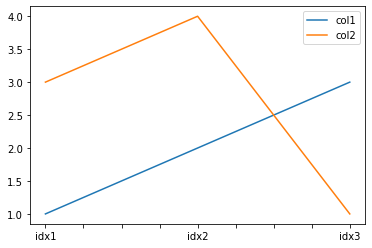

In [9]:
df = df_num()
df.plot()

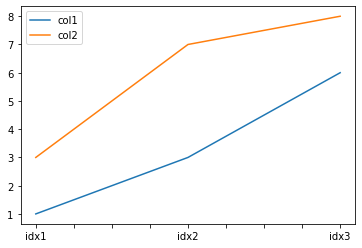

In [11]:
# 누적 그래프 보기
df.cumsum().plot()

## DF Indexing

df.col, df[] / iloc[ ] / loc[ ]
- [col_name]: 숫자 들어가면 오류(numpy나 Series의 []와 다름)
    - df['col_name',1]방식이 아닌 df['col_name'][1] 으로 접근해야 함
- loc[ ]: index와 column의 name 기반 인덱싱
    - index_name이 기본임. 즉 loc[index_name] 또는 loc[index_name, col_name]
- iloc[int]: 위치기반 인덱싱: , interger slicing, 

- 모두 slicing, fancy list 가능. 단 boolean indexing은 []와 loc[]만 되고 iloc[ ]는 안됨
- loc은 index값 기준, iloc은 위치 기준이기에 index값이 0부터 시작하지 않으면 햇갈릴 수 있으니 주의

In [ ]:
df = df_simple()
df

,name,year,points
0,Beomwoo,2013,1.5
1,Beomwoo,2014,1.7
2,Beomwoo,2015,3.6
3,Kim,2016,2.4
4,Park,2015,2.9


#### 결론
- column 하나 선택할 때는 df.colname
- column 복수개 선택할 때는 df[[col1, col2]]를, 
- 특정 조건에 맞는 행 골라낼 떄는 df[df['year']>2014]를
- 나머지는 loc[index], loc[index, colname] 사용하기

#### 특정 col 선택하기: df[]로 하자

In [ ]:
print( df['name'],'\n')  # df['name',1] 방식은 안됨
print( df.name) 

# df[0], df[0,1],df[[0,1,2]] 등은 오류발생
# data_df.loc[:,'Name'] 같은 형식은 굳이 쓸 필요 없음
# data_df.iloc[:,0]

0    Beomwoo
1    Beomwoo
2    Beomwoo
3        Kim
4       Park
Name: name, dtype: object 

0    Beomwoo
1    Beomwoo
2    Beomwoo
3        Kim
4       Park
Name: name, dtype: object


In [ ]:
df[['name', 'points']] #fancy list. [[]] 두개 적어줘야함에 유의! 
# df.['name', 'points']는 안됨

,name,points
0,Beomwoo,1.5
1,Beomwoo,1.7
2,Beomwoo,3.6
3,Kim,2.4
4,Park,2.9


In [ ]:
# 주의!!!! 아래 문제있음
df_new = df[['name', 'points']]
df_new['points'] = 1
df

/opt/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,name,year,points
0,Beomwoo,2013,1.5
1,Beomwoo,2014,1.7
2,Beomwoo,2015,3.6
3,Kim,2016,2.4
4,Park,2015,2.9


chained indexing 문제
https://www.notion.so/uoneway/SettingWithCopyWarning-df-a-dc0b32dd1c1c4208b5e8c92063e19e46

df[0][1]은 df[0]조회 후 그 중 [1]을 다시 조회하는 방식  
df[0]조회가 copy냐 view냐에 따라 결과가 의도와 다르게 달라질 수 있음  
결론: df에 값 대입할 때는 df[][]=a 형식 말고 df.iloc 또는 loc을 쓰자

#### 특정 행 선택: df.loc[]

한 행 추출: loc, iloc 모두 Series 리턴

In [ ]:
print( type(df.loc[1]), df.loc[1],'\n') #index명 넣은것임
print( type(df.iloc[0]), df.iloc[0] )   #위치 넣은것임
# df[0] 는 오류남

<class 'pandas.core.series.Series'> name      Beomwoo
year         2013
points        1.5
Name: 1, dtype: object 

<class 'pandas.core.series.Series'> name      Beomwoo
year         2013
points        1.5
Name: 1, dtype: object



복수개 행 추출(slicing)
- 위치기반인 loc은 그 특성상 숫자가 아닌 문자가 들어갈 수 있기 때문에 1:2로 하면 1만 나오는게 아닌 1~2가 나옴

In [ ]:
print( df.loc[1:3] ,'\n') #마지막도 포함해 3개를 출력함!
print( df[1:3],'\n')      #df[]도 slicing 되지만... col인것 같아 햇갈리니 사용 지양
print( df.iloc[1:3] ,'\n')  

      name  year  points
1  Beomwoo  2013     1.5
2  Beomwoo  2014     1.7
3  Beomwoo  2015     3.6 

      name  year  points
2  Beomwoo  2014     1.7
3  Beomwoo  2015     3.6 

      name  year  points
2  Beomwoo  2014     1.7
3  Beomwoo  2015     3.6 



#### 복합 선택

In [ ]:
df

,name,year,points
1,Beomwoo,2013,1.5
2,Beomwoo,2014,1.7
3,Beomwoo,2015,3.6
4,Kim,2016,2.4
5,Park,2015,2.9


In [ ]:
print( df['name'][4])
print( df.loc[4, 'name'])
print( df.iloc[4, 0] ) # df.iloc[5, 0] 해야 위와 동일한 결과 얻을 수 있음

Kim
Kim
Park


In [ ]:
# 하나 추출하는데 type 유지하고 싶다면?
a = df.loc[[1], 'name']
print(type(a),a) 

<class 'pandas.core.series.Series'> 1    Beomwoo
Name: name, dtype: object


- 여러개 선택하기(fancy list)

In [ ]:
print(df.loc[[1,3], ['name','points']],'\n')  # fancy list
print(df.loc[ 1:3,   'name':'points' ],'\n')  # slicing쓸때는 그 결과 자체가 collection을 리턴하기에 []뺴야함
print(df.iloc[1:3, [0,1]],'\n')

      name  points
1  Beomwoo     1.5
3  Beomwoo     3.6 

      name  year  points
1  Beomwoo  2013     1.5
2  Beomwoo  2014     1.7
3  Beomwoo  2015     3.6 

      name  year
2  Beomwoo  2014
3  Beomwoo  2015 



* 불린 인덱싱

In [ ]:
df['year'] > 2014

1    False
2    False
3     True
4     True
5     True
Name: year, dtype: bool

In [ ]:
df[df['year']>2014]

,name,year,points
3,Beomwoo,2015,3.6
4,Kim,2016,2.4
5,Park,2015,2.9


In [ ]:
df.loc[df['name'] == 'Beomwoo',['name','points']]

,name,points
1,Beomwoo,1.5
2,Beomwoo,1.7
3,Beomwoo,3.6


In [ ]:
cond1 = df['year']>2014
cond2 = df['name'] == 'Beomwoo'
df[ cond1 & cond2]

,name,year,points
3,Beomwoo,2015,3.6


* DataFrame ix[] 연산자: 추후 pandas에서 deprecated될 예정

In [ ]:
print('컬럼 위치 기반 인덱싱 데이터 추출:',titanic_df.ix[0,2])
print('컬럼명 기반 인덱싱 데이터 추출:',titanic_df.ix[0,'Pclass'])

In [ ]:
print("\n ix[0,0]", data_df.ix[0,0])
print("\n ix['one', 0]", data_df.ix['one',0])
print("\n ix[3, 'Name']",data_df.ix[3, 'Name'],"\n")

print("\n ix[0:2, [0,1]]\n", data_df.ix[0:2, [0,1]])
print("\n ix[0:2, [0:3]]\n", data_df.ix[0:2, 0:3])
print("\n ix[0:3, ['Name', 'Year']]\n", data_df.ix[0:3, ['Name', 'Year']], "\n")
print("\n ix[:] \n", data_df.ix[:])
print("\n ix[:, :] \n", data_df.ix[:, :])

print("\n ix[data_df.Year >= 2014] \n", data_df.ix[data_df.Year >= 2014])
print('명칭기반 ix slicing\n', data_df.ix['one':'two', 'Name'],'\n')
print(data_df.ix[1:2 , 'Name'])

## DF data manipulation

In [ ]:
df = df_simple()
df

,name,year,points
0,Beomwoo,2013,1.5
1,Beomwoo,2014,1.7
2,Beomwoo,2015,3.6
3,Kim,2016,2.4
4,Park,2015,2.9


### 칼럼 단위 데이터 수정하기

In [ ]:
df['penalty']=1 # 모두 다 동일한 값으로 채워짐. 기존에 없던 col이면 신규 추가됨
df['zeros'] = np.arange(5)
df['series']  = pd.Series([-1.2, -1.5, -1.7], index=[0,2,3]) #Series이용해 특정 index 지정
df

,name,year,points,penalty,zeros,series
0,Beomwoo,2013,1.5,1,0,-1.2
1,Beomwoo,2014,1.7,1,1,NaN
2,Beomwoo,2015,3.6,1,2,-1.5
3,Kim,2016,2.4,1,3,-1.7
4,Park,2015,2.9,1,4,NaN


In [ ]:
df['points_by_10'] = df['points']*10
df['net_points'] = df['points'] - df['penalty']
df['high_points'] = df['net_points'] > 2.0
df

,name,year,points,penalty,zeros,series,points_by_10,net_points,high_points
0,Beomwoo,2013,1.5,1,0,-1.2,15.0,0.5,False
1,Beomwoo,2014,1.7,1,1,NaN,17.0,0.7,False
2,Beomwoo,2015,3.6,1,2,-1.5,36.0,2.6,True
3,Kim,2016,2.4,1,3,-1.7,24.0,1.4,False
4,Park,2015,2.9,1,4,NaN,29.0,1.9,False


### DataFrame 데이터 삭제: df.drop(), df[condition]

In [ ]:
df = df_simple()
df

,name,year,points
0,Beomwoo,2013,1.5
1,Beomwoo,2014,1.7
2,Beomwoo,2015,3.6
3,Kim,2016,2.4
4,Park,2015,2.9


원본은 바꾸지 않고 삭제한 df를 새로운 변수에 할당하기

In [ ]:
drop_df = df.drop('points', axis=1 ) # 칼럼 삭제. 1이 세로처럼 생겼으니... 
drop_df = drop_df.drop([1,2], axis=0 ) # (기본값)행 삭제. index 안바뀜에 주의
drop_df

,name,year
0,Beomwoo,2013
3,Kim,2016
4,Park,2015


바로 삭제하기(inplace =True), 한꺼번에 삭제하기(리스트로 지정)

In [ ]:
df.drop(['year', 'points'], axis=1, inplace=True) #리턴 None
df

,name
0,Beomwoo
1,Beomwoo
2,Beomwoo
3,Kim
4,Park


drop 안쓰고 그냥 조건절로 

In [ ]:
df = df_simple()
df_drop2 = df[df['year']>2014]
df_drop2

,name,year,points
2,Beomwoo,2015,3.6
3,Kim,2016,2.4
4,Park,2015,2.9


In [ ]:
# 열 삭제하기. del 사용도 가능
del drop_df['year']

### 특정 열/행 각각의 값에 함수 적용하기: Series.apply(lambda x: )
- 인수로 행 또는 열을 받는 함수를 apply 메서드의 인수로 넣어 df 특정 열(series) 내 각각의 값에, 또는 pd에 적용하여 각각의 row에 동일한 작업을 수행할 수 있다.
- 하지만 이를 적용하기 전에 series와 pandas에서 제공하는 기본 함수들을 찾아보자. 대부분 element-wise로 각각 적용되도록 되어 있는 함수들이다. 
    - https://pandas.pydata.org/pandas-docs/stable/reference/series.html
    - 예를 들어 df['a'].str.lower() 는 해당 칼럼(series)를 모두 소문자로 변경하는 함수임

In [ ]:
df = df_num()
df

,col1,col2
idx1,1,3
idx2,2,4
idx3,3,1


#### df.apply() 또는 series.apply() 

아래처럼 적용할 함수명을 인자로 전달하면
칼럼(또는 행렬)별로 동일한 작업(함수적용)을 반복수행 후 기 칼럼명(또는 index)을 가진 series로 리턴

In [ ]:
df.apply(np.sum) # sum() 형태로 넣는게 아님

col1    6
col2    8
dtype: int64

In [ ]:
df.apply(type)

col1    <class 'pandas.core.series.Series'>
col2    <class 'pandas.core.series.Series'>
col3    <class 'pandas.core.series.Series'>
col4    <class 'pandas.core.series.Series'>
dtype: object

In [ ]:
# 아래와 동일하다고 보면 됨
series = pd.Series()#df.iloc[0,:]
for col in df.columns:
    series[col] = np.sum(df[col])
series

/opt/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


col1    6
col2    8
dtype: int64

기본은 열방향. row단위 적용하고 싶을때는 axis=1

In [ ]:
df.apply(np.sum, axis =1) 

idx1    4
idx2    6
idx3    4
dtype: int64

df가 아닌 series에 대해서도 적용 가능.  
다음과 같이 특정 칼럼에 대해 작업 수행 후 새로운 칼럼에 넣어주는 식으로 많이 씀

In [ ]:
df['col3'] = df['col1'].apply(aa)
df

,col1,col2,col3
idx1,1,3,2
idx2,2,4,3
idx3,3,1,4


In [ ]:
# 다음 결과만 보면 모든 element에 aa함수가 적용된 것 처럼 보이지만
# 사실은 aa(column series) 결과가 이렇게 나온것일듯
def aa(x):
    return x+1
df.apply(aa)

# 실제로 모든 element에 적용하려면 applymap을 이용

,col1,col2
idx1,2,4
idx2,3,5
idx3,4,2


하지만 인수가 두개인 함수를 적용한다거나 복잡한 연산을 하기 위해서는 lamda를 같이 사용

#### 익명함수 lamda
lambda 익명함수 정의는 한줄 짜리 간단한 함수를 작성해서 편하게 쓴다든지, 메모리를 아끼고 가독성을 높이는데 유용하게 쓸 수 있습니다. (lambda는 이름 없는 익명함수이기 때문에 한번 실행되고 다음줄로 넘어가면 heap 메모리 영역에서 증발되므로 메모리를 아낄 수 있습니다.)

In [ ]:
#아래 둘은 동일한 표현
def get_square(x):
    return x**2

get_square = lambda x : x ** 2

9
<function <lambda> at 0x119d235f0>


In [ ]:
# 인자 두개 표현
get_square_2 = lambda x,y : x**y
get_square_2(2,2)

4

주로 apply와 함께 다음과 같이 쓰여짐
x에 

In [ ]:
df['col4'] = df['col1'].apply(lambda x : True if x <=2 else False)
df

,col1,col2,col3,col4
idx1,1,3,2,True
idx2,2,4,3,True
idx3,3,1,4,False


In [ ]:
# 이 때 x는 column (type: series)
df = df.apply(lambda x : df['col1']>True if x <=2 else False)
df

In [ ]:
# 나이에 따라 세분화된 분류를 수행하는 함수 생성. 
def get_category(age):
    cat = ''
    if age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 ‘Age’ 컬럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : 
                                                get_category(x))
titanic_df[['Age','Age_cat']].head()
    

,Age,Age_cat
0,22.0,Student
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Young Adult
4,35.0,Young Adult


In [ ]:
# python 기본 내장함수 map과 유사. series.map()함수도 있음(apply와 유사하게 작동)
a=[1,2,3]
squares = map(lambda x : x**2, a)
list(squares)

[1, 4, 9]

### NaN(결손 데이터) 처리하기

- NA(Not Available) 값으로는 python기본 None값과 np.nan(NaN:Not a Number)이 있다.
- To detect NaN values numpy uses np.isnan().
- to detect NaN values pandas uses either .isna() or .isnull()/notnull()
https://datascience.stackexchange.com/questions/37878/difference-between-isna-and-isnull-in-pandas

pandas uses several values to represent missing data, for instance :

- np.nan for float data
- np.nan or None for object-dtype data
- pd.NaT for datetime-like data

#### NaN 확인하기

In [ ]:
df = df_nan()
df

,col1,col2
idx1,1.40,NaN
idx2,7.10,-4.5
idx3,NaN,NaN
idx4,0.75,-1.3


In [ ]:
# isnull()로 결손 데이터 여부 확인. df.isna()와 동일
df.isnull()
# df['col1'] is not np.nan 같은 방식은 하나라도 not nan이면 True 하나를 리턴함

,col1,col2
idx1,False,True
idx2,False,False
idx3,True,True
idx4,False,False


In [ ]:
df.isnull( ).sum( ) # nan 상황 보기 위해 자주 사용되는 구문

col1    1
col2    2
dtype: int64

In [ ]:
# col2열이 NaN값인 행만 추출하기
df[df['col2'].isnull()]

,col1,col2
idx1,1.4,NaN
idx3,NaN,NaN


In [ ]:
df.notnull()

,col1,col2
idx1,True,False
idx2,True,True
idx3,False,False
idx4,True,True


In [ ]:
df.info() # 4 entries 중 col1에는 3 non-null이 있다.

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, idx1 to idx4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    3 non-null      float64
 1   col2    2 non-null      float64
dtypes: float64(2)
memory usage: 96.0+ bytes


#### NaN 데이터 삭제하기: dropna(how='any', inplace=False)
- how 옵션을 주면 조건을 설정할 수 있으며 'all'을 하면 모든 값이 nan인 것만 제외시킴 (ex. df.dropna(how='all') )
- aixs 옵션을 주면 제외할 축을 선택할 수 있음
- thresh 옵션을 주면 몇 개 이상의 값이 들어 있는지 선택해서 해당 행들만 볼 수 있음 (ex. df.dropna(thresh=2) )

In [ ]:
df = df_nan()
df

,col1,col2
idx1,1.40,NaN
idx2,7.10,-4.5
idx3,NaN,NaN
idx4,0.75,-1.3
idx5,1.00,-1.3


In [ ]:
# 행의 값중 하나라도 nan인 경우 그 행을 없앤다.
df.dropna() 

,col1,col2
idx2,7.10,-4.5
idx4,0.75,-1.3
idx5,1.00,-1.3


In [ ]:
# 행의 값의 모든 값이 nan인 경우 그 행으 없앤다.
df.dropna(how='all')

,col1,col2
idx1,1.40,NaN
idx2,7.10,-4.5
idx4,0.75,-1.3
idx5,1.00,-1.3


In [ ]:
df.dropna(axis=1) 

""
idx1
idx2
idx3
idx4
idx5


In [ ]:
# 결측치(NaN)가 1개보다 많은 행은 삭제하라(1개까지는 봐준다)
df.dropna( thresh = 1)

,col1,col2
idx1,1.40,NaN
idx2,7.10,-4.5
idx4,0.75,-1.3
idx5,1.00,-1.3


#### NaN 데이터 대체하기 fillna( )
- value  비어있는 값을 채울 값이나 사전 형식의 객체 전달
- method  기본적으로 ffill 사용
- axis  값을 채울 축
- limit  값을 앞 혹은 뒤에서 몇개까지 채울지

In [ ]:
df.fillna('C000')

,col1,col2
idx1,1.4,C000
idx2,7.1,-4.5
idx3,C000,C000
idx4,0.75,-1.3
idx5,1,-1.3


In [ ]:
#평균값으로 대체하기
df_fn = df.copy()
df_fn['col2'].fillna(df_fn['col2'].mean(), inplace = True)
df_fn

,col1,col2
idx1,1.40,-2.366667
idx2,7.10,-4.500000
idx3,NaN,-2.366667
idx4,0.75,-1.300000
idx5,1.00,-1.300000


In [ ]:
# 최빈값으로 대체하기
df_fn2 = df.copy()

# value_counts()로 값별 count 도출한 다음, 그 중 가장 값이 큰 row의 index를 반환
# 결국 해당 열에서 빈도가 가장 높은 값을 반환하게 됨
most_freq = df_fn2['col2'].value_counts().idxmax()
print(most_freq)
df_fn2['col2'].fillna(most_freq, inplace = True)
df_fn2

-1.3


,col1,col2
idx1,1.40,-1.3
idx2,7.10,-4.5
idx3,NaN,-1.3
idx4,0.75,-1.3
idx5,1.00,-1.3


## 자주 발생하는 오류

ValueError: If using all scalar values, you must pass an index

In [ ]:
# 다음과 같이 df 선언하면 오류남
# df = pd.DataFrame({'col_1': 1, 'col_2': 2})

In [ ]:
# 말 그대로 index를 넣어주거나, 값을 scalar가 아닌 [1] 등으로 바꿔주면 됨.
# dataframe 답지 않은 값이라서??
df = pd.DataFrame({'col_1': 1, 'col_2': 2}, index=['idx1'])
df 

,col_1,col_2
idx1,1,2
